In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn streamlit


Note: you may need to restart the kernel to use updated packages.


In [2]:
# --- Import des bibliothèques de base ---
import pandas as pd
import numpy as np

In [3]:


# --- Définir les chemins vers les datasets ---
path_churn = r"C:\Users\aya\Desktop\StayTelligence\DataSet\Churn_Modelling.csv"
path_purchase = r"C:\Users\aya\Desktop\StayTelligence\DataSet\Customer Purchasing Behaviors.csv"
path_segment = r"C:\Users\aya\Desktop\StayTelligence\DataSet\customer_segmentation_data.csv"
path_retail = r"C:\Users\aya\Desktop\StayTelligence\DataSet\retail_data.csv"

# --- Lecture des fichiers CSV ---
df_churn = pd.read_csv(path_churn)
df_purchase = pd.read_csv(path_purchase)
df_segment = pd.read_csv(path_segment)
df_retail = pd.read_csv(path_retail)

# --- Vérification rapide du chargement ---
print("✅ Données importées avec succès :")
print(f"Churn dataset : {df_churn.shape}")
print(f"Purchasing dataset : {df_purchase.shape}")
print(f"Segmentation dataset : {df_segment.shape}")
print(f"Retail dataset : {df_retail.shape}")


✅ Données importées avec succès :
Churn dataset : (10000, 14)
Purchasing dataset : (238, 7)
Segmentation dataset : (1000, 9)
Retail dataset : (302010, 1)


## Visualiastion

In [5]:
# Afficher les premières lignes
print("=== df_churn.head() ===")
display(df_churn.head())

print("\n=== df_purchase.head() ===")
display(df_purchase.head())

print("\n=== df_segment.head() ===")
display(df_segment.head())

print("\n=== df_retail.head() ===")
display(df_retail.head())

# Infos rapides
print("\n=== df_churn.info() ===")
print(df_churn.info())

print("\n=== df_purchase.info() ===")
print(df_purchase.info())

print("\n=== df_segment.info() ===")
print(df_segment.info())

print("\n=== df_retail.info() ===")
print(df_retail.info())

# Comptage des valeurs manquantes par dataset
print("\n=== Missing values ===")
for name, df in [("churn", df_churn), ("purchase", df_purchase), ("segment", df_segment), ("retail", df_retail)]:
    print(f"{name}: total_missing = {df.isna().sum().sum()} ; per_column ->")
    print(df.isna().sum().sort_values(ascending=False).head(10))
    print("-"*40)


=== df_churn.head() ===


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



=== df_purchase.head() ===


,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13



=== df_segment.head() ===


,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08



=== df_retail.head() ===


,Transaction_ID;Customer_ID;Name;Email;Phone;Address;City;State;Zipcode;Country;Age;Gender;Income;Customer_Segment;Date;Year;Month;Time;Total_Purchases;Amount;Total_Amount;Product_Category;Product_Brand;Product_Type;Feedback;Shipping_Method;Payment_Method;Order_Status;Ratings;products
0,8691788;37249;Michelle Harrington;Ebony39@gmai...
1,2174773;69749;Kelsey Hill;Mark36@gmail.com;685...
2,6679610;30192;Scott Jensen;Shane85@gmail.com;8...
3,7232460;62101;Joseph Miller;Mary34@gmail.com;2...
4,4983775;27901;Debra Coleman;Charles30@gmail.co...



=== df_churn.info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None

=== df_purchase.info() ===
<class 'pandas.core.frame.DataFrame'

## Ré-lecture correcte du fichier retail + vérif

In [7]:
# Ré-lecture du fichier retail avec le bon séparateur
path_retail = r"C:\Users\aya\Desktop\StayTelligence\DataSet\retail_data.csv"

# Essayer avec ; comme séparateur et encodage latin1 si besoin
df_retail = pd.read_csv(path_retail, sep=';', engine='python', encoding='utf-8')  



print("Shape df_retail:", df_retail.shape)
print("Colonnes:", df_retail.columns.tolist())
display(df_retail.head(5))
print(df_retail.info())


Shape df_retail: (302010, 30)
Colonnes: ['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases', 'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings', 'products']


,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [8]:
df_retail['Customer_Segment'].unique()


array(['Regular', 'Premium', 'New', nan], dtype=object)

In [9]:
df_retail['Customer_Segment'].value_counts()


Customer_Segment
Regular    146221
New         91187
Premium     64387
Name: count, dtype: int64

In [10]:
import pandas as pd
import numpy as np

# partons de df_retail déjà chargé
df = df_retail.copy()

# --- 1) Nettoyage rapide des dates ---
# essayer plusieurs formats si besoin ; ici on force parsing et on met NaT si échec
df['Date_parsed'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

# --- 2) Transformer Income en numérique (ex: "45k", "$45,000", "45000")
def income_to_number(x):
    if pd.isna(x): 
        return np.nan
    s = str(x).strip()
    # enlever symboles et espaces
    s = s.replace(',', '').replace('$', '').replace('€','').replace('£','').lower()
    # gérer "k" ou "m"
    try:
        if s.endswith('k'):
            return float(s[:-1]) * 1_000
        if s.endswith('m'):
            return float(s[:-1]) * 1_000_000
        return float(s)
    except:
        return np.nan

df['Income_num'] = df['Income'].apply(income_to_number)

# --- 3) Créer des métriques par client (groupby Customer_ID) ---
agg_funcs = {
    'Transaction_ID': 'nunique',       # nombre de transactions (distinctes) -> transaction_count
    'Amount': ['sum', 'mean', 'median'], 
    'Total_Purchases': 'max',          # si Total_Purchases est cumulatif, le max correspond au total réel
    'Total_Amount': 'max',             # idem
    'Ratings': 'mean',
    'Age': 'median',
    'Income_num': 'median',
    'Gender': lambda x: x.mode().iloc[0] if len(x.dropna())>0 else np.nan,
    'Customer_Segment': lambda x: x.mode().iloc[0] if len(x.dropna())>0 else np.nan,
    'Date_parsed': 'max',              # date du dernier achat
    # on peut garder Country/City si besoin
    'Country': lambda x: x.mode().iloc[0] if len(x.dropna())>0 else np.nan,
}

df_clients = df.groupby('Customer_ID').agg(agg_funcs)

# Les noms de colonnes deviennent multi-index, on les simplifie
df_clients.columns = [
    '_'.join(col).strip() if isinstance(col, tuple) else col for col in df_clients.columns.values
]

# Renommer pour plus de clarté
df_clients = df_clients.rename(columns={
    'Transaction_ID_nunique': 'transaction_count',
    'Amount_sum': 'amount_sum',
    'Amount_mean': 'amount_mean',
    'Amount_median': 'amount_median',
    'Total_Purchases_max': 'total_purchases',
    'Total_Amount_max': 'total_amount',
    'Ratings_mean': 'ratings_mean',
    'Age_median': 'age_median',
    'Income_num_median': 'income_median',
    'Date_parsed_max': 'last_purchase_date',
    'Customer_Segment_<lambda>': 'customer_segment_mode',
    'Gender_<lambda>': 'gender_mode',
    'Country_<lambda>': 'country_mode'
})

# --- 4) Recence (R) : calculer le nombre de jours depuis le dernier achat (par rapport à la date max du dataset) ---
max_date = df['Date_parsed'].max()
df_clients['recency_days'] = (max_date - df_clients['last_purchase_date']).dt.days

# --- 5) Quelques vérifications ---
print("Clients agrégés :", df_clients.shape)
display(df_clients.head(6))
print("\nQuelques stats rapides :")
print(df_clients[['transaction_count','amount_sum','total_purchases','total_amount','ratings_mean','recency_days']].describe())


C:\Users\aya\AppData\Local\Temp\ipykernel_15172\313402075.py:9: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date_parsed'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)


Clients agrégés : (86766, 14)


,transaction_count,amount_sum,amount_mean,amount_median,total_purchases,total_amount,ratings_mean,age_median,income_median,gender_mode,customer_segment_mode,last_purchase_date,country_mode,recency_days
Customer_ID,,,,,,,,,,,,,,
10000.0,4,940.297743,235.074436,215.852372,7.0,2683.057011,3.5,26.0,NaN,Male,Regular,2023-11-19,USA,102.0
10001.0,5,1517.921543,303.584309,302.082260,8.0,3879.544482,3.6,46.0,NaN,Male,Regular,2023-11-17,UK,104.0
10002.0,5,1117.164676,223.432935,140.442617,7.0,2831.505011,3.2,23.0,NaN,Female,Premium,2023-11-27,USA,94.0
10003.0,2,266.301835,133.150918,133.150918,9.0,1890.735874,2.5,25.0,NaN,Female,Regular,2023-07-17,USA,227.0
10004.0,2,460.702696,230.351348,230.351348,6.0,1541.117698,3.0,22.5,NaN,Male,Premium,2024-01-30,Canada,30.0
10005.0,1,439.021139,439.021139,439.021139,7.0,3073.147975,4.0,20.0,NaN,Male,Regular,2023-06-29,USA,245.0



Quelques stats rapides :
       transaction_count    amount_sum  total_purchases  total_amount  \
count       86766.000000  86766.000000     86755.000000  86748.000000   
mean            3.446315    886.188794         7.708812   2362.588987   
std             1.740939    519.907716         2.314885   1191.128295   
min             0.000000      0.000000         1.000000     10.304530   
25%             2.000000    487.611082         6.000000   1433.803733   
50%             3.000000    815.112627         8.000000   2340.272694   
75%             5.000000   1201.167069        10.000000   3276.011703   
max            13.000000   4588.737152        10.000000   4999.625796   

       ratings_mean  recency_days  
count  86756.000000  86753.000000  
mean       3.164021     96.000081  
std        0.830157     83.558913  
min        1.000000      0.000000  
25%        2.666667     30.000000  
50%        3.200000     72.000000  
75%        3.750000    141.000000  
max        5.000000    365.0

In [11]:
# Agrégation par client
df_clients = df_retail.groupby('Customer_ID').agg({
    'Total_Amount': 'sum',       # Total dépensé
    'Total_Purchases': 'sum',    # Nombre d'achats
    'Customer_Segment': 'first', # Segment connu (Regular, Premium, New)
    'Age': 'first',
    'Gender': 'first',
    'Income': 'first'
}).reset_index()

print("Clients agrégés :", df_clients.shape)
display(df_clients.head())


Clients agrégés : (86766, 7)


,Customer_ID,Total_Amount,Total_Purchases,Customer_Segment,Age,Gender,Income
0,10000.0,5007.566357,21.0,Regular,26.0,Male,High
1,10001.0,8136.462824,24.0,Regular,19.0,Male,Medium
2,10002.0,4104.013951,17.0,Regular,22.0,Female,High
3,10003.0,2340.496447,17.0,Regular,26.0,Male,High
4,10004.0,2356.516683,10.0,Regular,23.0,Male,High


In [12]:
print(df_clients['Customer_Segment'].unique())
print(df_clients['Customer_Segment'].value_counts())


['Regular' 'Premium' 'New' None]
Customer_Segment
Regular    51661
New        24263
Premium    10835
Name: count, dtype: int64


In [13]:
display(df_clients.describe())


,Customer_ID,Total_Amount,Total_Purchases,Age
count,86766.000000,86766.000000,86766.000000,86758.000000
mean,55005.912500,4749.801931,18.614019,28.470458
std,25985.457848,3204.715483,10.875653,12.161616
min,10000.000000,0.000000,0.000000,18.000000
25%,32502.250000,2293.959964,10.000000,20.000000
50%,55013.500000,4224.173480,17.000000,22.000000
75%,77512.750000,6598.133456,25.000000,34.000000
max,99999.000000,29241.776770,83.000000,70.000000


In [14]:
df_retail['Date'] = pd.to_datetime(df_retail['Date'], errors='coerce')
df_clients['last_purchase_date'] = df_retail.groupby('Customer_ID')['Date'].max().values

print(df_clients[['Customer_ID', 'last_purchase_date']].head())


   Customer_ID last_purchase_date
0      10000.0         2023-11-19
1      10001.0         2023-11-17
2      10002.0         2023-11-27
3      10003.0         2023-07-17
4      10004.0         2024-01-30


In [15]:
1

1

In [16]:
import pandas as pd
from datetime import datetime

# Supposons que df_clients contient 'last_purchase_date' au format datetime
today = pd.to_datetime('2025-11-14')  # tu peux remplacer par la date actuelle
df_clients['Recency'] = (today - df_clients['last_purchase_date']).dt.days


In [17]:
2

2

In [18]:
# Age : remplacer les NaN par la médiane
df_clients['Age'].fillna(df_clients['Age'].median(), inplace=True)

# Gender : encodage 0=Male, 1=Female
df_clients['Gender'] = df_clients['Gender'].map({'Male': 0, 'Female': 1})

# Income : encodage ordinal (High=3, Medium=2, Low=1), NaN remplacé par médiane
income_map = {'Low': 1, 'Medium': 2, 'High': 3}
df_clients['Income'] = df_clients['Income'].map(income_map)
df_clients['Income'].fillna(df_clients['Income'].median(), inplace=True)



C:\Users\aya\AppData\Local\Temp\ipykernel_15172\4193937510.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clients['Age'].fillna(df_clients['Age'].median(), inplace=True)
C:\Users\aya\AppData\Local\Temp\ipykernel_15172\4193937510.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [19]:
3

3

In [20]:
features = ['Total_Amount', 'Total_Purchases', 'Recency', 'Age', 'Gender', 'Income']
X = df_clients[features]


In [21]:
4

4

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
5

5

In [24]:
# Vérifier les colonnes avec NaN
print(X.isna().sum())


Total_Amount        0
Total_Purchases     0
Recency            13
Age                 0
Gender             12
Income              0
dtype: int64


In [25]:
# Remplacer Recency manquante par la médiane
X['Recency'].fillna(X['Recency'].median(), inplace=True)

# Remplacer Gender manquant par la valeur la plus fréquente
X['Gender'].fillna(X['Gender'].mode()[0], inplace=True)


C:\Users\aya\AppData\Local\Temp\ipykernel_15172\2491283692.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Recency'].fillna(X['Recency'].median(), inplace=True)
C:\Users\aya\AppData\Local\Temp\ipykernel_15172\2491283692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Recency'].fillna(X['Recency'].median(), inplace=True)
C:\Users\

In [26]:
# Vérifier les colonnes avec NaN
print(X.isna().sum())


Total_Amount       0
Total_Purchases    0
Recency            0
Age                0
Gender             0
Income             0
dtype: int64


       Total_Amount  Total_Purchases       Recency           Age  Gender_enc  \
count  8.676600e+04     8.676600e+04  8.676600e+04  8.676600e+04     86766.0   
mean   1.775415e-16     7.894373e-17  5.316418e-16  5.928969e-17         0.0   
std    1.000006e+00     1.000006e+00  1.000006e+00  1.000006e+00         0.0   
min   -1.482138e+00    -1.711541e+00 -1.148934e+00 -8.609274e-01         0.0   
25%   -7.663258e-01    -7.920507e-01 -7.898787e-01 -6.964691e-01         0.0   
50%   -1.640181e-01    -1.484075e-01 -2.872018e-01 -5.320109e-01         0.0   
75%    5.767570e-01     5.871847e-01  5.386244e-01  4.547383e-01         0.0   
max    7.642524e+00     5.920229e+00  3.219567e+00  3.414986e+00         0.0   

       Income_enc  
count         0.0  
mean          NaN  
std           NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN  


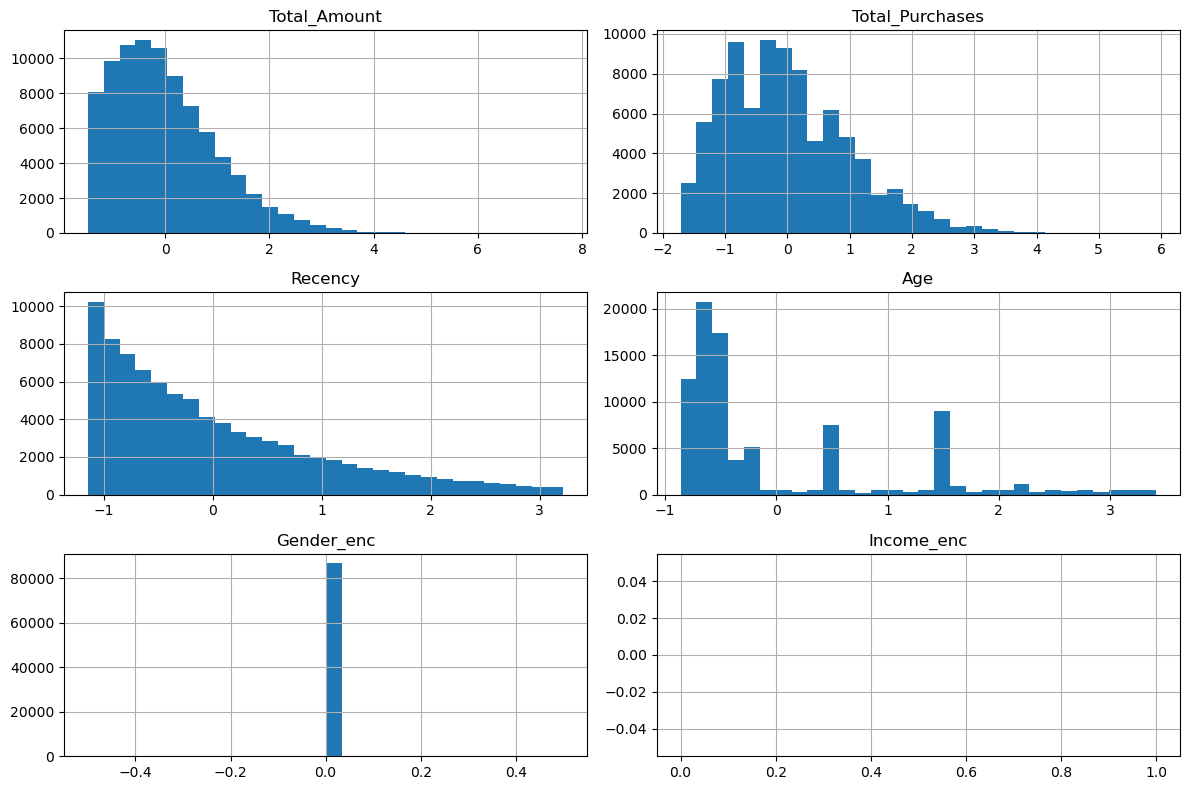

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir en DataFrame pour inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Statistiques
print(X_scaled_df.describe())

# Histogrammes
X_scaled_df.hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()


In [71]:
print(X.columns)


Index(['Total_Amount', 'Total_Purchases', 'Recency', 'Age', 'Gender_enc',
       'Income_enc'],
      dtype='object')


In [77]:
print(X['Gender_enc'].value_counts())
print(X['Income_enc'].value_counts())


Gender_enc
0    86766
Name: count, dtype: int64
Series([], Name: count, dtype: int64)


In [79]:
print(df_clients[['Gender', 'Income']].head(10))
print(df_clients['Income'].isna().sum())
print(df_clients['Gender'].isna().sum())


   Gender  Income
0     0.0     3.0
1     0.0     2.0
2     1.0     3.0
3     0.0     3.0
4     0.0     3.0
5     0.0     2.0
6     0.0     1.0
7     0.0     1.0
8     0.0     1.0
9     0.0     2.0
0
12


In [81]:
# Remplacer les NaN
df_clients['Gender'].fillna(df_clients['Gender'].mode()[0], inplace=True)
df_clients['Income'].fillna(df_clients['Income'].median(), inplace=True)


C:\Users\aya\AppData\Local\Temp\ipykernel_15172\899516218.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clients['Gender'].fillna(df_clients['Gender'].mode()[0], inplace=True)
C:\Users\aya\AppData\Local\Temp\ipykernel_15172\899516218.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [83]:
features = ['Total_Amount', 'Total_Purchases', 'Recency', 'Age', 'Gender', 'Income']
X = df_clients[features]

# Standardisation uniquement sur les colonnes continues
from sklearn.preprocessing import StandardScaler
cols_to_scale = ['Total_Amount', 'Total_Purchases', 'Recency', 'Age']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[cols_to_scale])

# Recomposer X final
X_final = pd.DataFrame(X_scaled, columns=cols_to_scale)
X_final['Gender'] = X['Gender']
X_final['Income'] = X['Income']

# Vérification
print(X_final.describe())


       Total_Amount  Total_Purchases       Recency           Age  \
count  8.676600e+04     8.676600e+04  8.675300e+04  8.676600e+04   
mean   1.775415e-16     7.894373e-17  4.432650e-16  5.928969e-17   
std    1.000006e+00     1.000006e+00  1.000006e+00  1.000006e+00   
min   -1.482138e+00    -1.711541e+00 -1.148898e+00 -8.609274e-01   
25%   -7.663258e-01    -7.920507e-01 -7.898674e-01 -6.964691e-01   
50%   -1.640181e-01    -1.484075e-01 -2.872251e-01 -5.320109e-01   
75%    5.767570e-01     5.871847e-01  5.385443e-01  4.547383e-01   
max    7.642524e+00     5.920229e+00  3.219303e+00  3.414986e+00   

             Gender        Income  
count  86766.000000  86766.000000  
mean       0.384044      1.963534  
std        0.486371      0.697425  
min        0.000000      1.000000  
25%        0.000000      1.000000  
50%        0.000000      2.000000  
75%        1.000000      2.000000  
max        1.000000      3.000000  


C:\Users\aya\AppData\Local\Temp\ipykernel_15172\2271581482.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Gender'].fillna(X['Gender'].mode()[0], inplace=True)
C:\Users\aya\AppData\Local\Temp\ipykernel_15172\2271581482.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'].fillna(X['Gender'].mode()[0], inplace=True)
C:\Users\

Nombre de clients par cluster :
cluster
1    49842
0    36924
Name: count, dtype: int64

Profil moyen par cluster :
         Total_Amount  Total_Purchases   Recency       Age    Gender    Income
cluster                                                                       
0            0.862330         0.884836 -0.485238 -0.326171  0.390451  1.991063
1           -0.638832        -0.655505  0.359474  0.241634  0.379299  1.943140


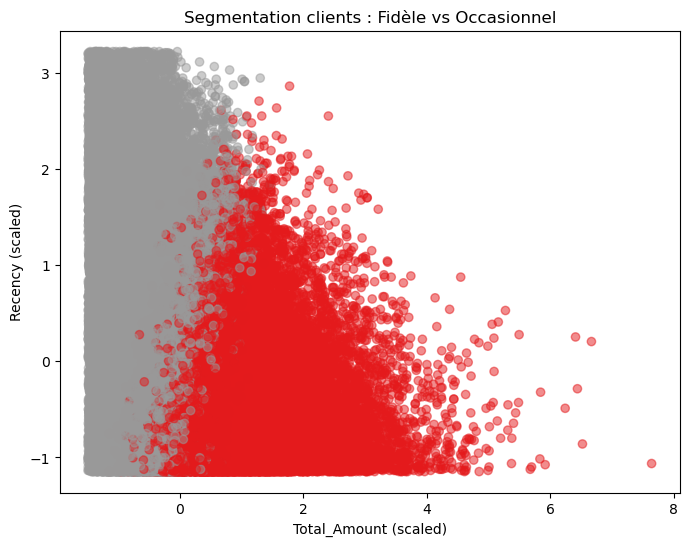

In [85]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- 1) Sélection des features ---
features = ['Total_Amount', 'Total_Purchases', 'Recency', 'Age', 'Gender', 'Income']
X = df_clients[features]

# --- 2) Remplissage des NaN ---
X['Gender'].fillna(X['Gender'].mode()[0], inplace=True)
X['Income'].fillna(X['Income'].median(), inplace=True)
X['Recency'].fillna(X['Recency'].median(), inplace=True)

# --- 3) Standardisation des colonnes continues ---
cols_to_scale = ['Total_Amount', 'Total_Purchases', 'Recency', 'Age']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[cols_to_scale])

# --- 4) Recomposer DataFrame final ---
X_final = pd.DataFrame(X_scaled, columns=cols_to_scale)
X_final['Gender'] = X['Gender']
X_final['Income'] = X['Income']

# --- 5) K-Means avec K=2 ---
kmeans = KMeans(n_clusters=2, random_state=42)
X_final['cluster'] = kmeans.fit_predict(X_final)

# --- 6) Analyse des clusters ---
print("Nombre de clients par cluster :")
print(X_final['cluster'].value_counts())

print("\nProfil moyen par cluster :")
print(X_final.groupby('cluster')[features].mean())

# --- 7) Visualisation simple ---
plt.figure(figsize=(8,6))
plt.scatter(X_final['Total_Amount'], X_final['Recency'], c=X_final['cluster'], cmap='Set1', alpha=0.5)
plt.xlabel('Total_Amount (scaled)')
plt.ylabel('Recency (scaled)')
plt.title('Segmentation clients : Fidèle vs Occasionnel')
plt.show()


### Silhouette Score

In [87]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_final[cols_to_scale], X_final['cluster'])
print("Silhouette Score :", score)


Silhouette Score : 0.3014663422211156


In [92]:
from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(X_final[cols_to_scale], X_final['cluster'])
print("Calinski-Harabasz Score :", ch_score)


Calinski-Harabasz Score : 45909.94851887251


In [94]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X_final[cols_to_scale], X_final['cluster'])
print("Davies-Bouldin Score :", db_score)


Davies-Bouldin Score : 1.2287926476062427


#### Métrique	Valeur	Interprétation
#### Silhouette	0.30	Cohérence modérée, chevauchement possible
#### Calinski-Harabasz	45 909	Bonne séparation globale
#### Davies-Bouldin	1.23	Bonne séparation relative, clusters homogènes

In [97]:
print(X_final.groupby('cluster')[['Total_Amount', 'Recency']].mean())


         Total_Amount   Recency
cluster                        
0            0.862330 -0.485238
1           -0.638832  0.359474


In [99]:
cluster_to_loyalty = {0: 1, 1: 0}


In [101]:
X_final['Loyalty'] = X_final['cluster'].map(cluster_to_loyalty)


In [103]:
print(X_final[['cluster', 'Loyalty']].value_counts())


cluster  Loyalty
1        0          49842
0        1          36924
Name: count, dtype: int64


In [105]:
# Sélection des features + label
dataset_loyalty = X_final[features + ['Loyalty']]

# Vérification
print(dataset_loyalty.head())


   Total_Amount  Total_Purchases   Recency       Age  Gender  Income  Loyalty
0      0.080433         0.219389  0.071853 -0.203095     0.0     3.0        1
1      1.056780         0.495236  0.095790 -0.778698     0.0     2.0        1
2     -0.201513        -0.148408 -0.023895 -0.532011     1.0     3.0        0
3     -0.751804        -0.148408  1.567915 -0.203095     0.0     3.0        0
4     -0.746805        -0.792051 -0.789879 -0.449782     0.0     3.0        0


In [ ]:
### CSV

In [107]:
# --- 9) Export en CSV ---
dataset_loyalty.to_csv('dataset_loyalty_clients.csv', index=False)
print("Dataset final exporté : dataset_loyalty_clients.csv")

# --- Vérification rapide ---
print(dataset_loyalty.head())
print(dataset_loyalty['Loyalty'].value_counts())

Dataset final exporté : dataset_loyalty_clients.csv
   Total_Amount  Total_Purchases   Recency       Age  Gender  Income  Loyalty
0      0.080433         0.219389  0.071853 -0.203095     0.0     3.0        1
1      1.056780         0.495236  0.095790 -0.778698     0.0     2.0        1
2     -0.201513        -0.148408 -0.023895 -0.532011     1.0     3.0        0
3     -0.751804        -0.148408  1.567915 -0.203095     0.0     3.0        0
4     -0.746805        -0.792051 -0.789879 -0.449782     0.0     3.0        0
Loyalty
0    49842
1    36924
Name: count, dtype: int64
